# Meeting Log Sheet Analysis

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [161]:
data=pd.read_excel("Sample Month End Report for Assesment.xlsx",sheet_name=None)

In [162]:
xls=pd.ExcelFile("Sample Month End Report for Assesment.xlsx")

In [163]:
xls.sheet_names

['Time spent Analysis', 'Key Accounts', 'Meeting Log', 'Inquiry Tracker']

In [164]:
data=pd.read_excel("Sample Month End Report for Assesment.xlsx",sheet_name="Meeting Log")
data.head()

,Date of Activity,Activity Type,Company,Project,Hours spent,Accomplishment / Summary,Remarks,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2025-02-03 00:00:00,NaN,SN Estates & innotech,SNN Serenity,1.75,NaN,Site,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-02-03 00:00:00,NaN,VSR Constructions,KC General hospital,1.25,Project is in Initial Stage,Office,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-02-04 00:00:00,NaN,Somersett pharma,Somerset pharma,1,NaN,Office & site,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-02-04 00:00:00,NaN,Bhoruka,Bhoruka Tech park,0.75,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-02-05 00:00:00,NaN,Novotel,Novotel Hotels,1,Project is in Initial Stage,Site,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
data.columns.tolist()

['Date of Activity',
 'Activity Type',
 'Company',
 'Project',
 'Hours spent',
 'Accomplishment / Summary',
 'Remarks',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12']

In [166]:
data.drop(["Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12"], axis=1, inplace=True)


In [167]:
data

,Date of Activity,Activity Type,Company,Project,Hours spent,Accomplishment / Summary,Remarks
0,2025-02-03 00:00:00,NaN,SN Estates & innotech,SNN Serenity,1.75,NaN,Site
1,2025-02-03 00:00:00,NaN,VSR Constructions,KC General hospital,1.25,Project is in Initial Stage,Office
2,2025-02-04 00:00:00,NaN,Somersett pharma,Somerset pharma,1,NaN,Office & site
3,2025-02-04 00:00:00,NaN,Bhoruka,Bhoruka Tech park,0.75,NaN,Office
4,2025-02-05 00:00:00,NaN,Novotel,Novotel Hotels,1,Project is in Initial Stage,Site
...,...,...,...,...,...,...,...
463,2025-11-10 00:00:00,Internal team meeting,Pidilite,Pidilite,3.25,Discussion with sales team,NaN
464,2025-11-11 00:00:00,Internal team meeting,Pidilite,Pidilite,3.25,Discussion with PPS team,NaN
465,2025-11-14 00:00:00,Internal team meeting,MRM,MRM,1,Review meeting with bijoy sir,NaN
466,2025-11-26 00:00:00,Techno commercial,Pidilite,Pidilite,0.5,Discussion with manu and mondelez team,NaN


In [168]:

data.dtypes

Date of Activity            object
Activity Type               object
Company                     object
Project                     object
Hours spent                 object
Accomplishment / Summary    object
Remarks                     object
dtype: object

In [169]:
data['Company'] = data['Company'].str.lower().str.strip()


In [170]:
data['Hours spent'] = pd.to_numeric(data['Hours spent'], errors='coerce')


In [171]:
data['Hours spent']

0      1.75
1      1.25
2      1.00
3      0.75
4      1.00
       ... 
463    3.25
464    3.25
465    1.00
466    0.50
467    0.50
Name: Hours spent, Length: 468, dtype: float64

In [172]:
Company_hours=data.groupby('Company')["Hours spent"].sum()

In [173]:
sorted_hrs=Company_hours.sort_values(ascending=False)
sorted_hrs.head(50)

Company
chennai                                     32.00
pidilite                                    22.75
design tree                                 21.25
bagmane developers                          18.25
kalpataru projects international limited    17.75
asg win                                     17.75
hyderabad travel                            16.00
crn architects                              14.00
birla groups                                12.00
colliers                                    11.90
sumadhura developers                        11.50
innotech                                    10.75
sattva projects                              9.75
embassy developers                           9.75
a n prakash consultants                      9.50
mrm                                          8.75
prestige developers                          8.50
redeconn event                               8.25
pidilite - pps - delhi                       8.00
concorde developers                       

In [174]:
data['Company'].value_counts()

Company
design tree                                 15
asg win                                     13
kalpataru projects international limited    12
crn architects                              11
bagmane developers                          11
                                            ..
sterling engineers                           1
bandari constructions                        1
venkatramana associates                      1
vasvani developers                           1
pidilite - pps - delhi                       1
Name: count, Length: 216, dtype: int64

In [175]:
data.isnull().sum()

Date of Activity              1
Activity Type               309
Company                       2
Project                      18
Hours spent                  26
Accomplishment / Summary     64
Remarks                     167
dtype: int64

In [176]:
columns=data.columns.str.lower().str.strip()
data.columns=columns.str.replace(' ','_')
data.columns

Index(['date_of_activity', 'activity_type', 'company', 'project',
       'hours_spent', 'accomplishment_/_summary', 'remarks'],
      dtype='object')

In [177]:
data['date_of_activity']=pd.to_datetime(data['date_of_activity'],errors='coerce')

In [178]:
data

,date_of_activity,activity_type,company,project,hours_spent,accomplishment_/_summary,remarks
0,2025-02-03,NaN,sn estates & innotech,SNN Serenity,1.75,NaN,Site
1,2025-02-03,NaN,vsr constructions,KC General hospital,1.25,Project is in Initial Stage,Office
2,2025-02-04,NaN,somersett pharma,Somerset pharma,1.00,NaN,Office & site
3,2025-02-04,NaN,bhoruka,Bhoruka Tech park,0.75,NaN,Office
4,2025-02-05,NaN,novotel,Novotel Hotels,1.00,Project is in Initial Stage,Site
...,...,...,...,...,...,...,...
463,2025-11-10,Internal team meeting,pidilite,Pidilite,3.25,Discussion with sales team,NaN
464,2025-11-11,Internal team meeting,pidilite,Pidilite,3.25,Discussion with PPS team,NaN
465,2025-11-14,Internal team meeting,mrm,MRM,1.00,Review meeting with bijoy sir,NaN
466,2025-11-26,Techno commercial,pidilite,Pidilite,0.50,Discussion with manu and mondelez team,NaN


In [179]:
data.isnull().sum()

date_of_activity              2
activity_type               309
company                       2
project                      18
hours_spent                  26
accomplishment_/_summary     64
remarks                     167
dtype: int64

In [180]:
data.iloc[324:328]

,date_of_activity,activity_type,company,project,hours_spent,accomplishment_/_summary,remarks
324,NaT,NaN,NaN,NaN,NaN,NaN,NaN
325,NaT,Activity Type,company,Project,NaN,Accomplishment / Summary,Remarks
326,2025-09-22,Applicator Meeting,asg win,Multiple projects,2.0,Discussion of product approval for bagmane pro...,Site
327,2025-10-07,Applicator Techno Commercial,asg win,Multiple Projects,1.5,Discussion for multiple projects,Office


In [181]:
data=data.dropna(subset=['date_of_activity'])

In [182]:
data.dtypes

date_of_activity            datetime64[ns]
activity_type                       object
company                             object
project                             object
hours_spent                        float64
accomplishment_/_summary            object
remarks                             object
dtype: object

In [183]:
data['hours_spent'].isnull().sum()

np.int64(24)

In [184]:
data['hours_spent']=data['hours_spent'].fillna(0)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10560\1227422218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hours_spent']=data['hours_spent'].fillna(0)


In [185]:
data['hours_spent'].isnull().sum()

np.int64(0)

In [186]:
data.isnull().sum()

date_of_activity              0
activity_type               308
company                       1
project                      17
hours_spent                   0
accomplishment_/_summary     63
remarks                     166
dtype: int64

In [187]:
data.isnull().sum()

date_of_activity              0
activity_type               308
company                       1
project                      17
hours_spent                   0
accomplishment_/_summary     63
remarks                     166
dtype: int64

In [188]:
data.loc[458:461, 'company'] = (
    data.loc[458:461, 'company'].replace('-', np.nan)
)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10560\2599336696.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loc[458:461, 'company'].replace('-', np.nan)


In [189]:

data['company'] = data['company'].replace(r'^\s*$', np.nan, regex=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10560\3254796833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['company'] = data['company'].replace(r'^\s*$', np.nan, regex=True)


In [190]:
data['company'].loc[449:450]

449    -
450    -
Name: company, dtype: object

In [191]:
data=data.drop(450)

In [192]:
data.shape

(465, 7)

In [193]:
data.isnull().sum()

date_of_activity              0
activity_type               308
company                       5
project                      17
hours_spent                   0
accomplishment_/_summary     62
remarks                     166
dtype: int64

In [194]:
data=data.dropna(subset=['company'])

In [195]:
data.shape

(460, 7)

In [196]:
data = data.rename(columns={'accomplishment_/_summary': 'accomplishment/summary'})


In [197]:
data.columns

Index(['date_of_activity', 'activity_type', 'company', 'project',
       'hours_spent', 'accomplishment/summary', 'remarks'],
      dtype='object')

In [198]:
data.isnull().sum()

date_of_activity            0
activity_type             307
company                     0
project                    17
hours_spent                 0
accomplishment/summary     58
remarks                   161
dtype: int64

In [199]:
categorical_col=['activity_type','project','accomplishment/summary','remarks']
for col in categorical_col:
    data[col]=data[col].fillna('Unknown')

In [200]:
data.isnull().sum()

date_of_activity          0
activity_type             0
company                   0
project                   0
hours_spent               0
accomplishment/summary    0
remarks                   0
dtype: int64

In [201]:
data['accomplishment/summary']=data['accomplishment/summary'].str.replace('Unknown','Not Mentioned')

In [202]:
data['accomplishment/summary']

0                                          Not Mentioned
1                            Project is in Initial Stage
2                                          Not Mentioned
3                                          Not Mentioned
4                            Project is in Initial Stage
                             ...                        
463                          Discussion with sales team 
464                             Discussion with PPS team
465                       Review meeting with bijoy sir 
466               Discussion with manu and mondelez team
467    Discuusion with gerry for JSVK project require...
Name: accomplishment/summary, Length: 460, dtype: object

In [203]:
data['remarks']=data['remarks'].str.replace('Unknown','No remarks')

In [204]:
data['remarks']

0               Site
1             Office
2      Office & site
3             Office
4               Site
           ...      
463       No remarks
464       No remarks
465       No remarks
466       No remarks
467       No remarks
Name: remarks, Length: 460, dtype: object

In [205]:
text_cols = [
    'activity_type',
    'company',
    'project',
    'remarks',
    'accomplishment/summary'
]

for col in text_cols:
    data[col] = data[col].str.strip().str.lower()


In [206]:
data

,date_of_activity,activity_type,company,project,hours_spent,accomplishment/summary,remarks
0,2025-02-03,unknown,sn estates & innotech,snn serenity,1.75,not mentioned,site
1,2025-02-03,unknown,vsr constructions,kc general hospital,1.25,project is in initial stage,office
2,2025-02-04,unknown,somersett pharma,somerset pharma,1.00,not mentioned,office & site
3,2025-02-04,unknown,bhoruka,bhoruka tech park,0.75,not mentioned,office
4,2025-02-05,unknown,novotel,novotel hotels,1.00,project is in initial stage,site
...,...,...,...,...,...,...,...
463,2025-11-10,internal team meeting,pidilite,pidilite,3.25,discussion with sales team,no remarks
464,2025-11-11,internal team meeting,pidilite,pidilite,3.25,discussion with pps team,no remarks
465,2025-11-14,internal team meeting,mrm,mrm,1.00,review meeting with bijoy sir,no remarks
466,2025-11-26,techno commercial,pidilite,pidilite,0.50,discussion with manu and mondelez team,no remarks


In [207]:
data = data.drop_duplicates()

In [208]:
data['activity_type'].unique()

array(['unknown', 'techno - commercial', 'introduction pitch',
       'internal team meeting', 'group presntation', 'applicator meeting',
       'applicator techno commercial', 'techno commercial', 'site visit',
       'leave', 'internal meeting', 'technical presentation', 'admin'],
      dtype=object)

In [209]:
data['activity_type']=data['activity_type'].str.replace('techno - commercial','techno commercial')

In [210]:
data['activity_type'] = data['activity_type'].replace(
    'internal meeting',
    'internal team meeting'
)


In [211]:
data['activity_type'].value_counts()

activity_type
unknown                         307
techno commercial                62
introduction pitch               50
site visit                       24
internal team meeting            11
applicator meeting                1
group presntation                 1
applicator techno commercial      1
leave                             1
technical presentation            1
admin                             1
Name: count, dtype: int64

In [212]:
data['activity_type'].unique()

array(['unknown', 'techno commercial', 'introduction pitch',
       'internal team meeting', 'group presntation', 'applicator meeting',
       'applicator techno commercial', 'site visit', 'leave',
       'technical presentation', 'admin'], dtype=object)

In [213]:
data['accomplishment/summary'].value_counts()

accomplishment/summary
product presentation                                          80
not mentioned                                                 58
multiple project discussion                                   32
project discussion                                            28
site visit                                                    26
                                                              ..
meet - niranjan for updating key accounts and projections.     1
meet with bijoy sir                                            1
discussion with pps team                                       1
discussion with manu and mondelez team                         1
discuusion with gerry for jsvk project requiremnts             1
Name: count, Length: 156, dtype: int64

In [214]:
# Create a boolean mask
presentation_rows = data['accomplishment/summary'].str.contains('discussion', case=False, na=False)

# Retrieve only the values from that column
presentation_values = data.loc[presentation_rows, 'accomplishment/summary']

# View the results
print(presentation_values)

8                        discussion of multiple projects
10                       discussion of multiple projects
12                       discussion for upcoming project
13                     discussion for ejc in bms college
15                       discussion of multiple projects
                             ...                        
451    multiple project discussion and po status for ...
454       discussion with pps team for upcoming projects
463                           discussion with sales team
464                             discussion with pps team
466               discussion with manu and mondelez team
Name: accomplishment/summary, Length: 175, dtype: object


In [215]:
data['accomplishment/summary']

0                                          not mentioned
1                            project is in initial stage
2                                          not mentioned
3                                          not mentioned
4                            project is in initial stage
                             ...                        
463                           discussion with sales team
464                             discussion with pps team
465                        review meeting with bijoy sir
466               discussion with manu and mondelez team
467    discuusion with gerry for jsvk project require...
Name: accomplishment/summary, Length: 460, dtype: object

In [216]:
def summary_category(text):
    if pd.isna(text):
        return 'Not Mentioned'
    
    text = text.lower()

    if 'presentation' in text or 'training' in text or 'exhibition' in text:
        return 'Product Presentation'
    
    elif 'site visit' in text or 'inspection' in text or 'site survey' in text:
        return 'Site Visit'
    
    elif 'technical' in text or 'qc' in text:
        return 'Technical Discussion'
    
    elif 'approval' in text or 'negotiation' in text or 'loi' in text:
        return 'Approval / Negotiation'
    
    elif 'sample' in text or 'mock up' in text:
        return 'Sample / Mock-up'
    
    elif 'pricing' in text or 'po' in text or 'boq' in text or 'order' in text:
        return 'Commercial / Order'
    
    elif 'meet' in text or 'meeting' in text:
        return 'Meeting'
    
    elif 'event' in text:
        return 'Event / Training'
    
    elif 'discussion' in text:
        return 'Project Discussion'
    elif 'initial' in text:
        return 'Project is in initial stage'
    else:
        return 'Not Mentioned'


In [217]:
data['summary_category'] = data['accomplishment/summary'].apply(summary_category)

In [218]:
data

,date_of_activity,activity_type,company,project,hours_spent,accomplishment/summary,remarks,summary_category
0,2025-02-03,unknown,sn estates & innotech,snn serenity,1.75,not mentioned,site,Not Mentioned
1,2025-02-03,unknown,vsr constructions,kc general hospital,1.25,project is in initial stage,office,Project is in initial stage
2,2025-02-04,unknown,somersett pharma,somerset pharma,1.00,not mentioned,office & site,Not Mentioned
3,2025-02-04,unknown,bhoruka,bhoruka tech park,0.75,not mentioned,office,Not Mentioned
4,2025-02-05,unknown,novotel,novotel hotels,1.00,project is in initial stage,site,Project is in initial stage
...,...,...,...,...,...,...,...,...
463,2025-11-10,internal team meeting,pidilite,pidilite,3.25,discussion with sales team,no remarks,Project Discussion
464,2025-11-11,internal team meeting,pidilite,pidilite,3.25,discussion with pps team,no remarks,Project Discussion
465,2025-11-14,internal team meeting,mrm,mrm,1.00,review meeting with bijoy sir,no remarks,Meeting
466,2025-11-26,techno commercial,pidilite,pidilite,0.50,discussion with manu and mondelez team,no remarks,Project Discussion


In [219]:
data['summary_category'].value_counts()

summary_category
Product Presentation           130
Project Discussion             120
Not Mentioned                   72
Site Visit                      51
Technical Discussion            29
Approval / Negotiation          17
Meeting                         15
Commercial / Order               9
Sample / Mock-up                 9
Project is in initial stage      6
Event / Training                 2
Name: count, dtype: int64

In [220]:
data.groupby('summary_category')['accomplishment/summary'].count()

summary_category
Approval / Negotiation          17
Commercial / Order               9
Event / Training                 2
Meeting                         15
Not Mentioned                   72
Product Presentation           130
Project Discussion             120
Project is in initial stage      6
Sample / Mock-up                 9
Site Visit                      51
Technical Discussion            29
Name: accomplishment/summary, dtype: int64

# Analysis

In [221]:
data.describe()

,date_of_activity,hours_spent
count,460,460.000000
mean,2025-06-29 15:39:07.826086912,1.505217
min,2025-02-03 00:00:00,0.000000
25%,2025-04-15 18:00:00,1.000000
50%,2025-06-26 12:00:00,1.250000
75%,2025-09-12 06:00:00,1.750000
max,2025-11-27 00:00:00,8.000000
std,NaN,1.311170


In [222]:
data['hours_spent'].skew()

np.float64(3.1127385074659153)

In [223]:
# Right skew → few activities consume more time
# Median < Mean → some long meetings exist

In [224]:
data.groupby('date_of_activity').size()

date_of_activity
2025-02-03    2
2025-02-04    2
2025-02-05    2
2025-02-06    3
2025-02-07    2
             ..
2025-11-21    2
2025-11-24    2
2025-11-25    3
2025-11-26    4
2025-11-27    4
Length: 205, dtype: int64

In [225]:
data.groupby('date_of_activity')['hours_spent'].sum().describe()
# each day hours spentand their description

count    205.000000
mean       3.377561
std        2.105707
min        0.000000
25%        2.500000
50%        3.250000
75%        4.000000
max       13.500000
Name: hours_spent, dtype: float64

In [226]:
#75% of days → ≤ 4 hours
#Only 25% of days → more than 4 hours
#Daily work hours are right-skewed
#Most days fall between 2.5 – 4 hours
#A few days have very high workload, pulling the average up

In [227]:
daily_hours = data.groupby('date_of_activity')['hours_spent'].sum()
daily_hours

date_of_activity
2025-02-03    3.00
2025-02-04    1.75
2025-02-05    1.75
2025-02-06    2.75
2025-02-07    2.75
              ... 
2025-11-21    3.50
2025-11-24    4.00
2025-11-25    4.00
2025-11-26    3.00
2025-11-27    3.75
Name: hours_spent, Length: 205, dtype: float64

In [228]:
high_load_days = daily_hours[daily_hours >= 13]

In [229]:
high_load_days

date_of_activity
2025-09-04    13.5
2025-09-26    13.5
Name: hours_spent, dtype: float64

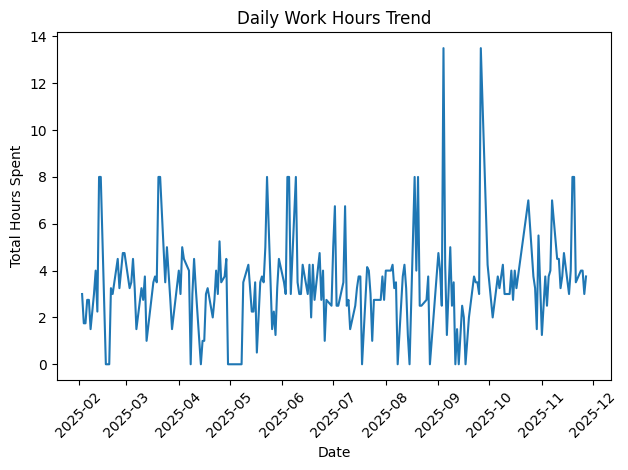

In [230]:
daily_hours = data.groupby('date_of_activity')['hours_spent'].sum()

plt.figure()
plt.plot(daily_hours.index, daily_hours.values)
plt.xlabel("Date")
plt.ylabel("Total Hours Spent")
plt.title("Daily Work Hours Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [231]:
data['month'] = data['date_of_activity'].dt.to_period('M')
monthly_hours = data.groupby('month')['hours_spent'].sum().sort_values(ascending=False)
monthly_hours

month
2025-11    84.25
2025-09    82.00
2025-06    81.25
2025-07    71.15
2025-04    68.25
2025-03    66.25
2025-08    63.00
2025-02    62.25
2025-10    58.00
2025-05    56.00
Freq: M, Name: hours_spent, dtype: float64

In [232]:
activity_count=data.groupby('month')['activity_type'].count().sort_values(ascending=False)
activity_count

month
2025-07    56
2025-11    53
2025-05    49
2025-03    47
2025-02    46
2025-04    46
2025-06    46
2025-09    44
2025-10    40
2025-08    33
Freq: M, Name: activity_type, dtype: int64

In [233]:
data

,date_of_activity,activity_type,company,project,hours_spent,accomplishment/summary,remarks,summary_category,month
0,2025-02-03,unknown,sn estates & innotech,snn serenity,1.75,not mentioned,site,Not Mentioned,2025-02
1,2025-02-03,unknown,vsr constructions,kc general hospital,1.25,project is in initial stage,office,Project is in initial stage,2025-02
2,2025-02-04,unknown,somersett pharma,somerset pharma,1.00,not mentioned,office & site,Not Mentioned,2025-02
3,2025-02-04,unknown,bhoruka,bhoruka tech park,0.75,not mentioned,office,Not Mentioned,2025-02
4,2025-02-05,unknown,novotel,novotel hotels,1.00,project is in initial stage,site,Project is in initial stage,2025-02
...,...,...,...,...,...,...,...,...,...
463,2025-11-10,internal team meeting,pidilite,pidilite,3.25,discussion with sales team,no remarks,Project Discussion,2025-11
464,2025-11-11,internal team meeting,pidilite,pidilite,3.25,discussion with pps team,no remarks,Project Discussion,2025-11
465,2025-11-14,internal team meeting,mrm,mrm,1.00,review meeting with bijoy sir,no remarks,Meeting,2025-11
466,2025-11-26,techno commercial,pidilite,pidilite,0.50,discussion with manu and mondelez team,no remarks,Project Discussion,2025-11


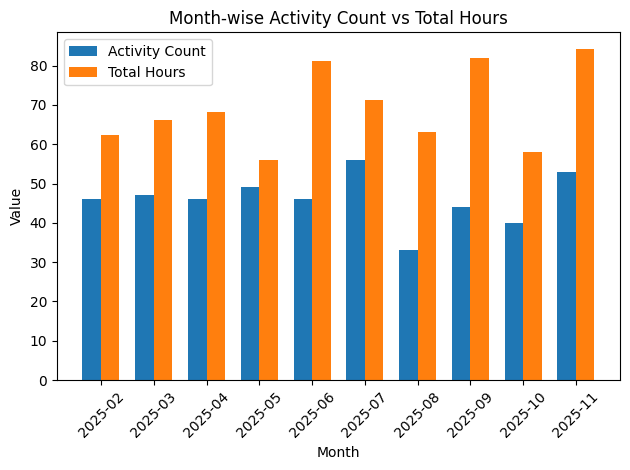

In [234]:
monthly_comparison = pd.DataFrame({
    'monthly_activity_count':activity_count,
    'monthly_hours': monthly_hours
}).sort_index()
x = np.arange(len(monthly_comparison))
width = 0.35

# Plot
plt.figure()
plt.bar(x - width/2, monthly_comparison['monthly_activity_count'], width, label='Activity Count')
plt.bar(x + width/2, monthly_comparison['monthly_hours'], width, label='Total Hours')

plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Month-wise Activity Count vs Total Hours")
plt.xticks(x, monthly_comparison.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [235]:
data['remarks'].unique()

array(['site', 'office', 'office & site', 'no remarks', 'site & office',
       'site visit', 'hyderabad visit', 'online', 'mysore visit',
       'delhi visit', 'bannerghatta road site', 'office and site'],
      dtype=object)

In [240]:
data['remarks']=data['remarks'].str.replace('office & site','office and site')

In [237]:
data['remarks']=data['remarks'].str.replace('site visit','site')

In [241]:
data['remarks'].unique()

array(['site', 'office', 'office and site', 'no remarks',
       'hyderabad visit', 'online', 'mysore visit', 'delhi visit',
       'bannerghatta road site'], dtype=object)

In [239]:
data

,date_of_activity,activity_type,company,project,hours_spent,accomplishment/summary,remarks,summary_category,month
0,2025-02-03,unknown,sn estates & innotech,snn serenity,1.75,not mentioned,site,Not Mentioned,2025-02
1,2025-02-03,unknown,vsr constructions,kc general hospital,1.25,project is in initial stage,office,Project is in initial stage,2025-02
2,2025-02-04,unknown,somersett pharma,somerset pharma,1.00,not mentioned,office & site,Not Mentioned,2025-02
3,2025-02-04,unknown,bhoruka,bhoruka tech park,0.75,not mentioned,office,Not Mentioned,2025-02
4,2025-02-05,unknown,novotel,novotel hotels,1.00,project is in initial stage,site,Project is in initial stage,2025-02
...,...,...,...,...,...,...,...,...,...
463,2025-11-10,internal team meeting,pidilite,pidilite,3.25,discussion with sales team,no remarks,Project Discussion,2025-11
464,2025-11-11,internal team meeting,pidilite,pidilite,3.25,discussion with pps team,no remarks,Project Discussion,2025-11
465,2025-11-14,internal team meeting,mrm,mrm,1.00,review meeting with bijoy sir,no remarks,Meeting,2025-11
466,2025-11-26,techno commercial,pidilite,pidilite,0.50,discussion with manu and mondelez team,no remarks,Project Discussion,2025-11


In [242]:
summary_cat_wise_hours = data.groupby('summary_category')['hours_spent'].sum().sort_values(ascending=False)

In [243]:
summary_cat_wise_hours

summary_category
Product Presentation           191.75
Project Discussion             189.40
Not Mentioned                   91.00
Site Visit                      74.25
Technical Discussion            40.50
Meeting                         31.50
Approval / Negotiation          25.50
Commercial / Order              16.25
Event / Training                16.00
Sample / Mock-up                10.25
Project is in initial stage      6.00
Name: hours_spent, dtype: float64

# Most of the presentation and discussion have done

In [247]:
location = data.groupby('remarks')['hours_spent'].sum().sort_values(ascending=False)
location

remarks
office                    260.75
no remarks                259.15
site                      126.75
office and site            16.50
hyderabad visit            16.00
online                     10.25
bannerghatta road site      1.25
delhi visit                 1.00
mysore visit                0.75
Name: hours_spent, dtype: float64

# The most activities done at office and second most not mentioned then at site.

In [251]:
monthly_project_count=data.groupby('month')['project'].count().sort_values(ascending=False)
monthly_project_count

month
2025-07    56
2025-11    53
2025-05    49
2025-03    47
2025-02    46
2025-04    46
2025-06    46
2025-09    44
2025-10    40
2025-08    33
Freq: M, Name: project, dtype: int64

# July 2025 had the highest number of project activities (56), 
# followed by November 2025 (53), 
# indicating these months had the highest project engagement.